In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt
#https://learnpython.com/blog/plot-waveform-in-python/

In [ ]:
def showWave001(waveFile):
    spf = wave.open(waveFile,'rb')
    sound_info = spf.readframes(-1)
    sound_info = fromstring(sound_info, 'Int16')

    f = spf.getframerate()
   
    subplot(211)
    plot(sound_info)
    title('Wave from and spectrogram of %s' % waveFile)

    subplot(212)
    spectrogram = plt.specgram(sound_info, Fs = f, scale_by_freq=True,sides='default')
   
    show()
    spf.close()

In [ ]:
import scikits.audiolab as audiolab
def showWave002(waveFile):
    '''
    Reads .wav file from STDIN and plots the spectrogram
    '''
    sound = audiolab.sndfile(waveFile,'read')
    # Reads wav file with audiolab
    sound_info = sound.read_frames(sound.get_nframes())
    # Extracts feature info from sound file with scipy module
    spectrogram = plt.specgram(sound_info) #spectrogram using matplotlib 
    title('Spectrogram of %s'%waveFile)
    show()
    sound.close()
    return spectrogram

In [2]:
wav_fname = 'C://Data//file_example_WAV_1MG.wav'
wav_obj = wave.open(wav_fname, 'rb')
sample_freq = wav_obj.getframerate()
n_samples = wav_obj.getnframes()
t_audio = n_samples/sample_freq
n_channels = wav_obj.getnchannels()
print(f'Debugging {sample_freq=} {n_samples=} {t_audio=} {n_channels=}')

Debugging sample_freq=44100 n_samples=262094 t_audio=5.9431746031746036 n_channels=2


In [3]:
signal_wave = wav_obj.readframes(n_samples)
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
l_channel = signal_array[0::2]
r_channel = signal_array[1::2]

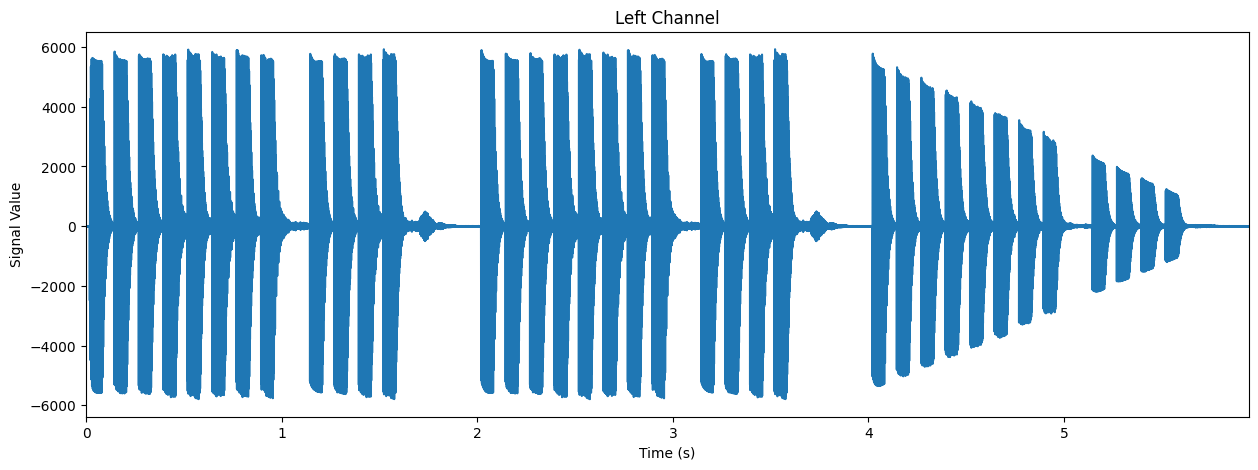

In [4]:
times = np.linspace(0, n_samples/sample_freq, num=n_samples)
plt.figure(figsize=(15, 5))
plt.plot(times, l_channel)
plt.title('Left Channel')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

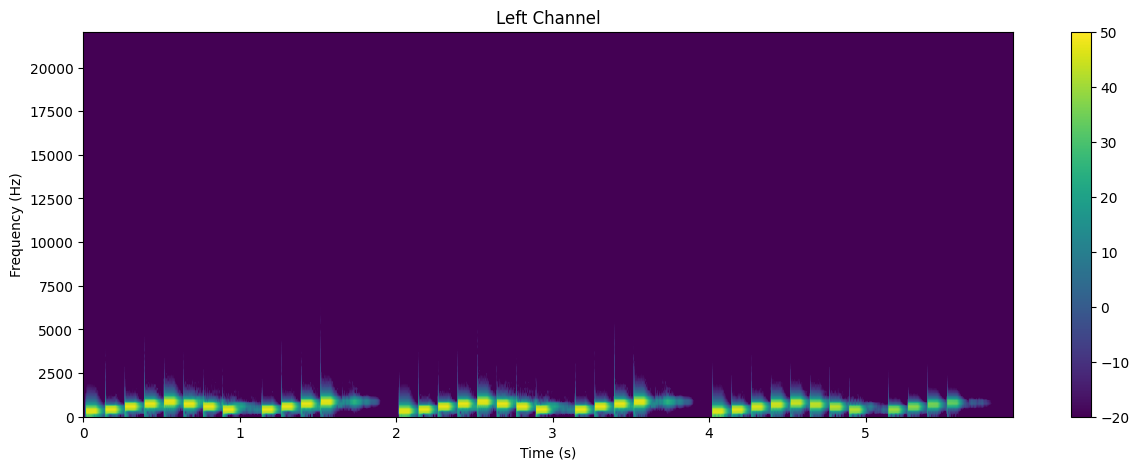

In [5]:
# frequency spectrum, also known as a spectrogram
plt.figure(figsize=(15, 5))
plt.specgram(l_channel, Fs=sample_freq, vmin=-20, vmax=50)
plt.title('Left Channel')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.colorbar()
plt.show()